# Overview of project:

**Objective:**
The objective of the project is to perform sentiment analysis on a large dataset of Amazon reviews comprising 4,000,000 samples. Among these, 400,000 reviews are designated for the testing dataset. The goal is to develop and evaluate logistic regression models for classifying the sentiment of Amazon reviews as either positive (1) or negative (0). Additionally, the project aims to compare the performance of logistic regression models trained with two different vectorization methods (TF-IDF and CountVectorizer) and select the most effective model based on predefined evaluation metrics, with a focus on precision to minimize false positives.

**Outline:**
1. [Import Packages](#1.-Import-packages)
2. [Load Data](#2.-Load-data)
3. [EDA](#3.-EDA)
4. [Data Cleaning](#4.-Data-Cleaning-&-Pre-processing)
5. [Modeling](#5.-Modeling)

**Data:**
Used this [Kaggle dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data)

**Data Preprocessing:**
   - The text data underwent preprocessing using a `clean_text` function, which included steps like tokenization, lowercasing, removing punctuation, and stop words.
   - Two different vectorization methods were applied to the preprocessed text data: CountVectorizer and TF-IDF vectorization.

**Model Training:**
   - Logistic regression models were trained using both CountVectorizer vectorized data and TF-IDF vectorized data.
   - The models were trained on a labeled dataset containing Amazon reviews and their corresponding sentiment labels (positive, 1, or negative, 0).

**Evaluation Metric:**
   - Precision was chosen as the evaluation metric of choice to reduce false positives.
   - Precision measures the proportion of true positive predictions among all positive predictions made by the model. 

**Results:**
- The logistic regression model trained with CountVectorizer achieved a precision score of 0.8856, indicating that 88.56% of the predicted positive reviews were indeed positive.
- The logistic regression model trained with TF-IDF vectorization achieved a precision score of 0.8830, slightly lower than CountVectorizer.

**Conclusion:**

In this project, logistic regression models were trained and evaluated for sentiment analysis on a dataset of 4,000,000 Amazon reviews. The CountVectorizer-based logistic regression model demonstrated slightly higher precision (0.8856) compared to the TF-IDF-based model (0.8830). The precision score reflects the percentage of accurately classified positive reviews, highlighting the effectiveness of both models in minimizing false positives.

**Next Steps:**

Moving forward, the project will explore the implementation of random forest and LSTM neural network models to further improve sentiment analysis on the Amazon review dataset. These models offer the potential to capture more complex patterns and relationships within the text data, potentially enhancing the overall performance of the sentiment analysis task.

# 1. Import packages

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import bz2
import os
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.util import ngrams

## 2. Load data

In [3]:
train = bz2.BZ2File('../src/archive/train.ft.txt.bz2')
test = bz2.BZ2File('../src/archive/test.ft.txt.bz2')
print(type(train))

<class 'bz2.BZ2File'>


In [4]:
def labels_comments(file_name):
    texts, labels = [], [] 
    for line in file_name:
        x = line.decode('utf-8')  #binary to string
        labels.append(int(x[9]) - 1)  #extract labels
        texts.append(x[10:].strip())  #extract texts
    return np.array(labels), texts

In [5]:
train_labels, train_reviews = labels_comments(train)
test_labels, test_reviews = labels_comments(test)

## 3. EDA

In [6]:
train_reviews[0]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [7]:
print(len(train_labels))

3600000


In [8]:
unique_train_labels, label_train_counts = np.unique(train_labels, return_counts=True)

Text(0.5, 1.0, 'Count of Labels for Training Data')

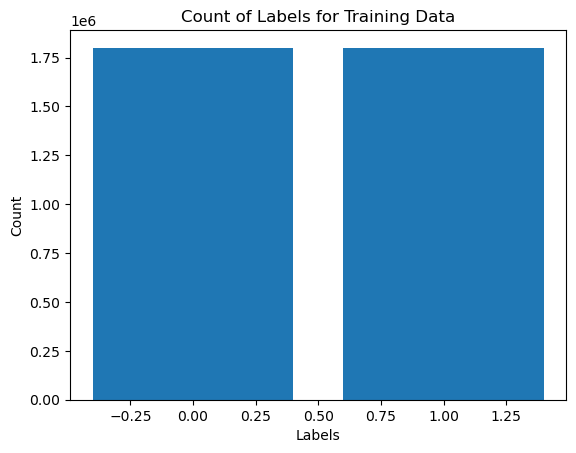

In [9]:
plt.bar(unique_train_labels, label_train_counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Labels for Training Data')

In [10]:
unique_test_labels, label_test_counts = np.unique(test_labels, return_counts=True)

Text(0.5, 1.0, 'Count of Labels for Testing Data')

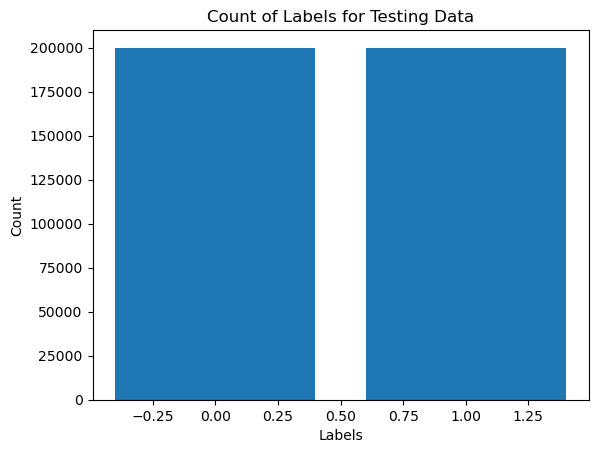

In [11]:
plt.bar(unique_test_labels, label_test_counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Labels for Testing Data')

## 4. Data Cleaning & Pre-processing

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annaparton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annaparton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 4a. Create function to clean data

Creating function to:
1. Tokenize each word
2. Lowercase all the words
3. Remove punctuation and special characters
4. Remove stop words
5. Stemming words (a lot of reviews so choosing this over lemmatizing words)

In [13]:
#creating function 
def clean_text(text):
    # Tokenization
    words = word_tokenize(text)
    
    # Lowercasing
    words = [word.lower() for word in words]
    
    # Removing punctuation and special characters
    words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in words]
    
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Join the words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# Example to make sure it works
text = "This product is not awesome"
cleaned_text = clean_text(text)
print(cleaned_text)

product awesom


### 4b. Clean train review data

In [14]:
train_cleaned_reviews = [clean_text(review) for review in train_reviews]


In [15]:
#make sure same length before and after clearning up the reviews
print(len(train_cleaned_reviews))
print(len(train_reviews))

3600000
3600000


### 4c. Cleaning up test review data. 

In [16]:
test_cleaned_reviews = [clean_text(review) for review in test_reviews]

### 4d. CountVectorizer()

In [17]:
vect = CountVectorizer()

vect.fit(train_cleaned_reviews)
 
train_cleaned_vect = vect.transform(train_cleaned_reviews)

test_cleaned_vect = vect.transform(test_cleaned_reviews)

In [20]:
#to keep things consistent will rename things to fit X_train, y_train, X_test, y_test 
X_train = train_cleaned_vect
X_test = test_cleaned_vect 
y_train = train_labels
y_test = test_labels

### 4e. TfidfVectorizer()

In [18]:
tf = TfidfVectorizer(max_features=5000) 

tf.fit(train_cleaned_reviews)
 
train_cleaned_tf = tf.transform(train_cleaned_reviews)

test_cleaned_tf = tf.transform(test_cleaned_reviews)

In [19]:
#creating X_train_tf and X_test_tf
X_train_tf = train_cleaned_tf
X_test_tf = test_cleaned_tf
y_train = train_labels
y_test = test_labels

## 5. Modeling

### 5a. Logistic Regression with CountVectorizer()

In [21]:
#Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Metric of choice is precision as want to minimize false positives 

In [22]:
#Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: {0:0.4f}". format(accuracy))
print("Precision score: {0:0.4f}". format(precision_score(y_test, y_pred)))

Accuracy score: 0.8913
Precision score: 0.8856


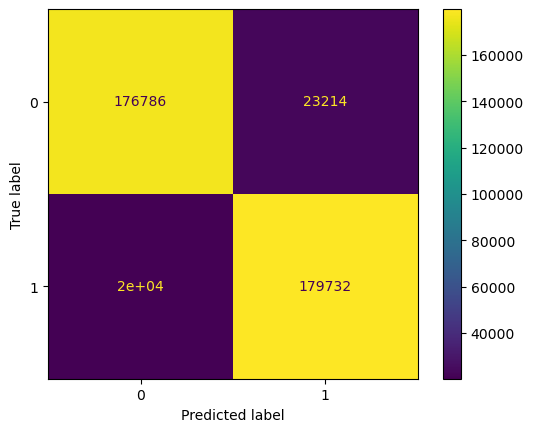

In [23]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =[0,1])
disp.plot()
plt.show()

### 5b. Logistic Regression with tfidfVectorizer()

In [24]:
#Train Logistic Regression Model
model_lr = LogisticRegression()
model_lr.fit(X_train_tf, y_train)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
#Evaluate Model
y_pred_tf = model_lr.predict(X_test_tf)
accuracy = accuracy_score(y_test, y_pred_tf)
print("Accuracy score: {0:0.4f}". format(accuracy))
print("Precision score: {0:0.4f}". format(precision_score(y_test, y_pred_tf)))

Accuracy score: 0.8857
Precision score: 0.8830


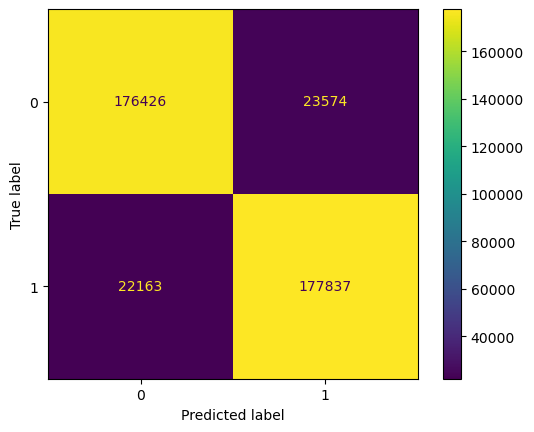

In [26]:
cm = confusion_matrix(y_test, y_pred_tf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =[0,1])
disp.plot()
plt.show()